# Neural Structured Learning

Neural Structured Learning (NSL) is a new learning paradigm to train neural networks by leveraging structured signals in addition to feature inputs. 

Structure can be explicit as represented by a graph or implicit as induced by adversarial perturbation.

Structured signals are commonly used to represent relations or similarity among samples that may be labeled or unlabeled. Therefore, leveraging these signals during neural network training harnesses both labeled and unlabeled data, which can improve model accuracy, particularly when the amount of labeled data is relatively small. 

Additionally, models trained with samples that are generated by adding adversarial perturbation have been shown to be robust against malicious attacks, which are designed to mislead a model's prediction or classification.

The NSL framework in TensorFlow provides the following easy-to-use APIs and tools for developers to train models with structured signals:

- Keras APIs to enable training with graphs (explicit structure) and adversarial perturbations (implicit structure).
- TF ops and functions to enable training with structure when using lower-level TensorFlow APIs
- Tools to build graphs and construct graph inputs for training


# NSL Framework in Tensorflow

Neural Structured Learning (NSL) focuses on training deep neural networks by leveraging structured signals (when available) along with feature inputs. As introduced by Bui et al. (WSDM'18), these structured signals are used to regularize the training of a neural network, forcing the model to learn accurate predictions (by minimizing supervised loss), while at the same time maintaining the input structural similarity (by minimizing the neighbor loss, see the figure below). This technique is generic and can be applied on arbitrary neural architectures (such as Feed-forward NNs, Convolutional NNs and Recurrent NNs)

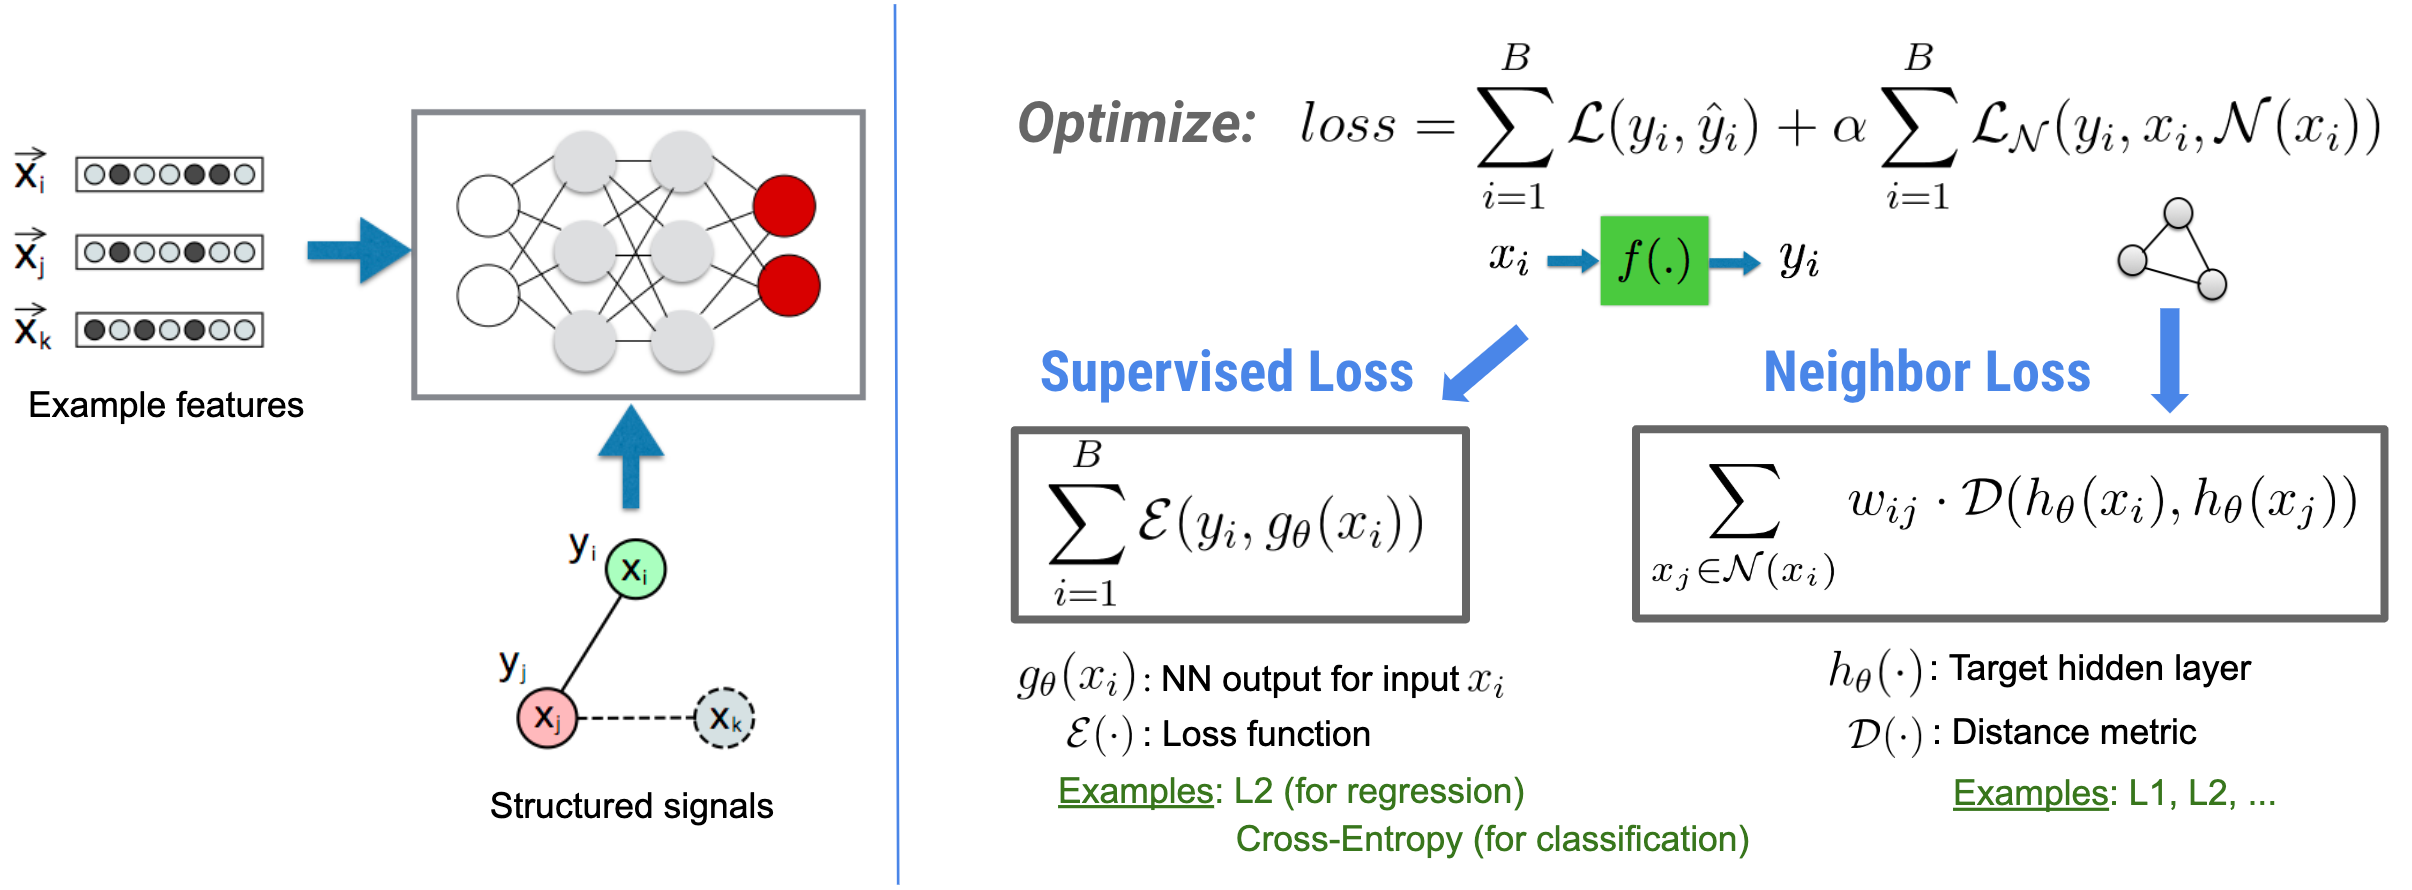

Therefore, NSL generalizes to Neural Graph Learning if neighbors are explicitly represented by a graph, and to Adversarial Learning if neighbors are implicitly induced by adversarial perturbation.

The overall workflow for Neural Structured Learning is illustrated below. Black arrows represent the conventional training workflow and red arrows represent the new workflow as introduced by NSL to leverage structured signals. 

First, the training samples are augmented to include structured signals. When structured signals are not explicitly provided, they can be either constructed or induced (the latter applies to adversarial learning). 

Next, the augmented training samples (including both original samples and their corresponding neighbors) are fed to the neural network for calculating their embeddings. 

The distance between a sample's embedding and its neighbor's embedding is calculated and used as the neighbor loss, which is treated as a regularization term and added to the final loss. 

For explicit neighbor-based regularization, we typically compute the neighbor loss as the distance between the sample's embedding and the neighbor's embedding.

However, any layer of the neural network may be used to compute the neighbor loss. On the other hand, for induced neighbor-based regularization (adversarial), we compute the neighbor loss as the distance between the output prediction of the induced adversarial neighbor and the ground truth label.

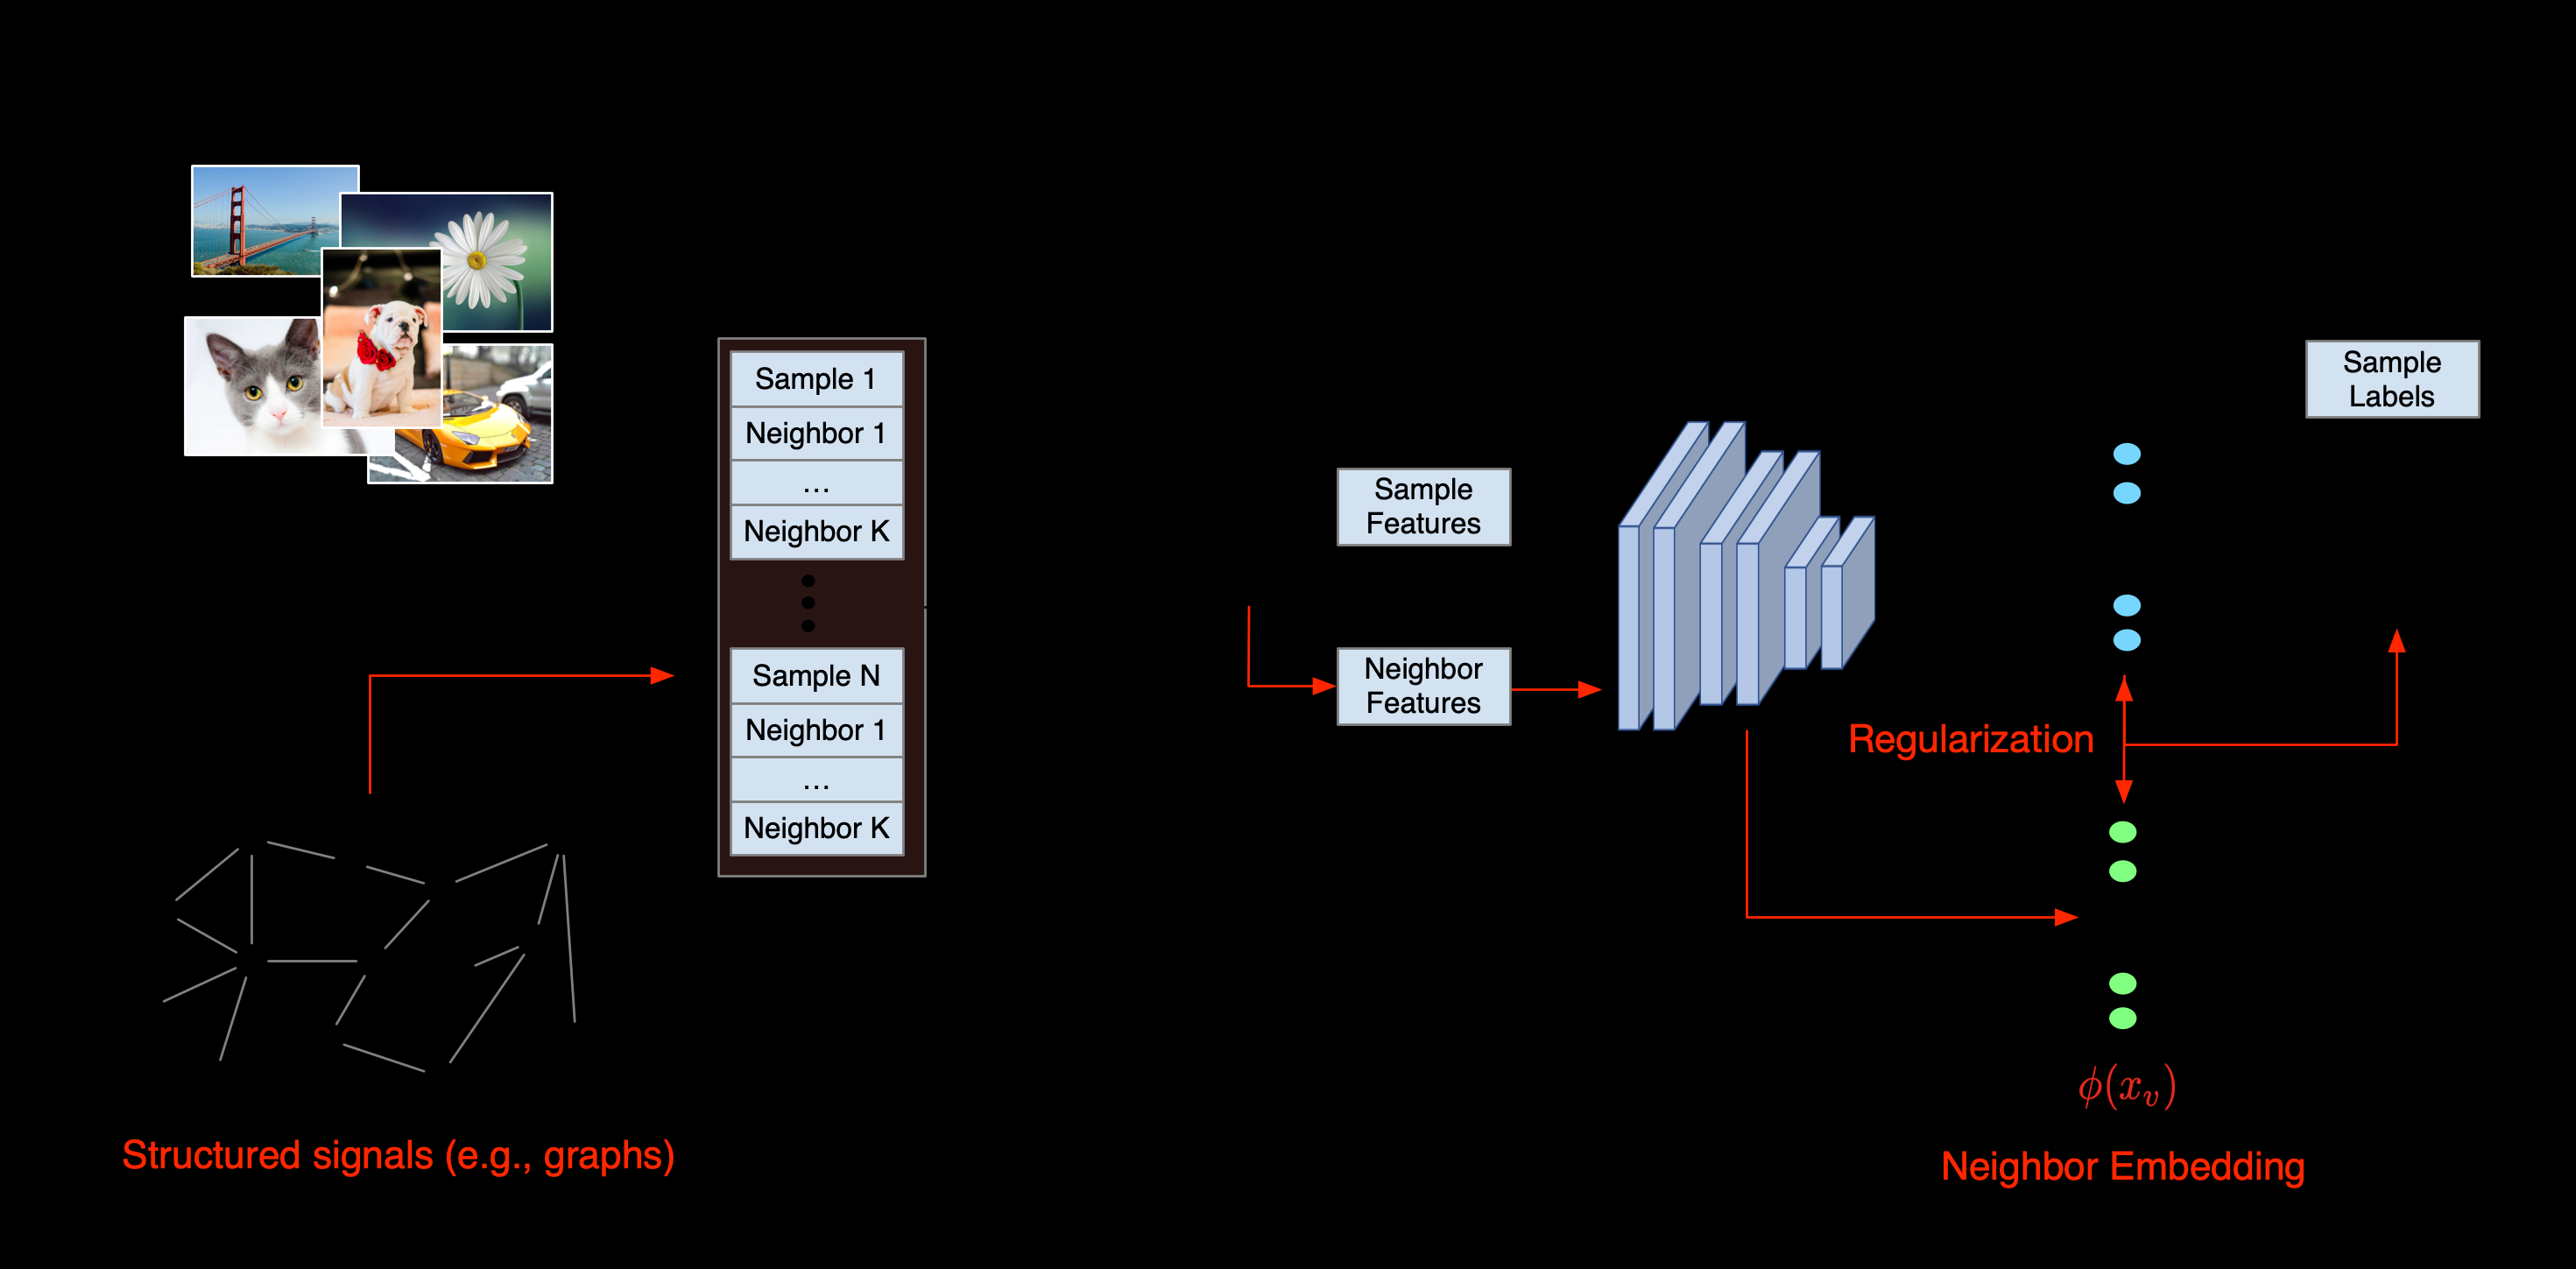

# Why NSL ?

Higher accuracy: the structured signal(s) among samples can provide information that is not always available in feature inputs; therefore, the joint training approach (with both structured signals and features) has been shown to outperform many existing methods (that rely on training with features only) on a wide range of tasks, such as document classification and semantic intent classification

Robustness: models trained with adversarial examples have been shown to be robust against adversarial perturbations designed for misleading a model's prediction or classification (Goodfellow et al., ICLR'15 & Miyato et al., ICLR'16). When the number of training samples is small, training with adversarial examples also helps improve model accuracy (Tsipras et al., ICLR'19).

Less labeled data required: NSL enables neural networks to harness both labeled and unlabeled data, which extends the learning paradigm to semi-supervised learning. Specifically, NSL allows the network to train using labeled data as in the supervised setting, and at the same time drives the network to learn similar hidden representations for the "neighboring samples" that may or may not have labels. This technique has shown great promise for improving model accuracy when the amount of labeled data is relatively small (Bui et al., WSDM'18 & Miyato et al., ICLR'16).